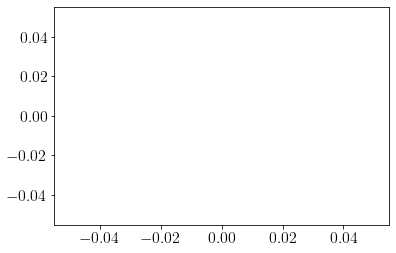

In [1]:
import os
import numpy as np
import pandas as pd
from IPython.display import display, Markdown, Latex
import json
from utils import CobbDouglasDeflator
from utils import cbeq, polyeq, term, is_divisible, Number
from matplotlib import pyplot as plt

plt.plot()

SMALL_SIZE = 14
MEDIUM_SIZE = 16
LARGE_SIZE = 18
HUGE_SIZE = 20

plt.rcdefaults()
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'Helvetica'
plt.rcParams['font.size'] = MEDIUM_SIZE
plt.rcParams['axes.titlesize'] = LARGE_SIZE
plt.rcParams['axes.labelsize'] = MEDIUM_SIZE
plt.rcParams['xtick.labelsize'] = MEDIUM_SIZE
plt.rcParams['ytick.labelsize'] = MEDIUM_SIZE
plt.rcParams['legend.fontsize'] = MEDIUM_SIZE
plt.rcParams['figure.titlesize'] = LARGE_SIZE
plt.rcParams['figure.figsize'] = [7.2, 7.2]
plt.rcParams['figure.dpi'] = 60
plt.rcParams['figure.facecolor'] = (1.0, 1.0, 1.0, 0.0)

JSON_FILE = "../assets/data/wk08_practice.json"
IMAGE_PATH = "../assets/images/wk08"
probs = []
nprob = 0

In [2]:
# Cobb Douglas Deflator
df = pd.read_csv("CobbDouglasDeflator_examples.csv")
grp1 = (df['CONST_UTIL_DEFLATOR']==100)
grp2 = (df['CPI']==100)
grp3 = (~grp1) & (~grp2)
mydf = pd.concat([
    df.loc[grp1].sample(20),
    df.loc[grp2].sample(20),
    df.loc[grp3].sample(30)
]).reset_index(drop=True)
for idx, row in mydf.iterrows():
    params = dict(row).copy()
    prob = CobbDouglasDeflator(params)
    cpi = prob.sol['CPI']
    cui = prob.sol['CONST_UTIL_DEFLATOR']
    income_needed = cui*prob.params['I'] / 100
    if (np.abs(cpi-100) > np.abs(cui-100)):
        overunder = 'overestimates'
    else:
        overunder = 'underestimates'
    
    setup = prob.setup()
    setup += fr"""
<p>1. Calculate the CPI in the comparison period relative to the base period.</p>
<p>2. How much income would be required in the comparison period to achieve the same utility as the base period?</p>
<p>3. Does the CPI underestimate or overestimate the welfare impact of the price changes?</p>
"""
    solution = fr"""
<p>CPI = \({cpi:G}\)</p>
<p>Income needed = \({income_needed:g}\)</p>
<p>CPI {overunder} the welfare impact</p>
"""
    probs.append({'setup':setup, 'solution':solution})
    nprob+=1
print(len(probs))

70


In [3]:
with open(JSON_FILE, 'w') as f:
    json.dump(probs, f)

In [4]:
with open(JSON_FILE, 'r') as f:
    myprobs = json.load(f)

In [5]:
prob = np.random.choice(myprobs)
display(Latex(prob['setup']))
display(Latex(prob['solution']))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>